# Analysis of Twitch Stream Data

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime as dt

The first step in such an analysis would to be categorize the game content in terms of the game titles streamed on Twitch.
The stream data is categorized based on the game titles and the count of streams for every game title.
Given below is a list of top 10 games streamed on Twitch.


Text(0.5, 1.0, 'Top 10 Games on Twitch')

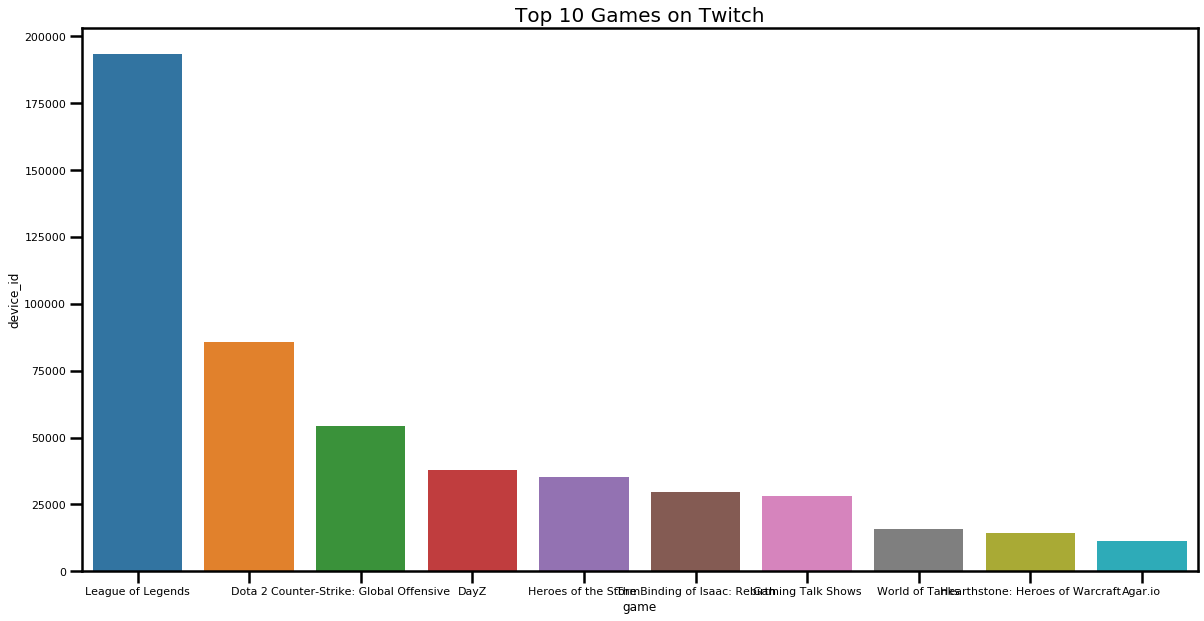

In [3]:

streams = pd.read_csv("stream.csv")

unique_games = streams.game.unique()
unique_channels = streams.channel.unique()

#print(unique_games,len(unique_games))
#print(unique_channels,len(unique_channels))

pop_game_10 = streams.groupby(["game"]).device_id.count().sort_values(ascending=False).reset_index().iloc[:10]


game_comp = plt.figure(figsize=[20,10])
sns.set_context("poster", font_scale=0.5)
sns.barplot(data=pop_game_10, x="game", y="device_id")
plt.title("Top 10 Games on Twitch", fontsize=20)

As can be seen in the bar graph above, the following games dominate Twitch in terms of number of streams viewed :
- League of Legends
- Dota 2
- Counter Strike : Global Offensive
    
Twitch is known to be a global platform with streams adding content from across the globe. With League of Legends, Dota 2 and CS:GO having the highest number of streams viewed, checking the country wide split of the streamers might give us an idea of its country wise popularity.

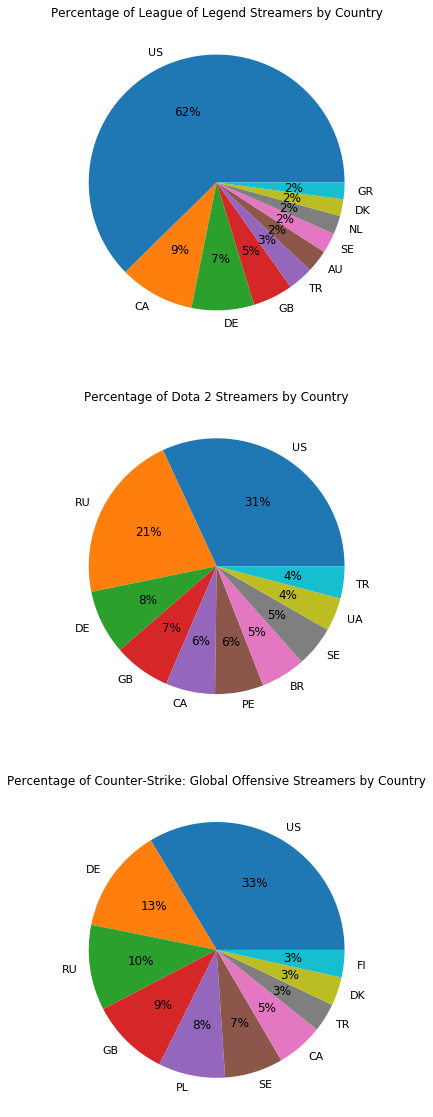

In [4]:
lol_countries = streams[streams["game"] == "League of Legends"].country.value_counts().reset_index()

country_split = plt.figure(figsize=[20,20])
ax1 = plt.subplot(3,3,2)
ax1.pie(lol_countries["country"].iloc[:10],labels = lol_countries["index"].iloc[:10],autopct="%d%%")
ax1.set_title("Percentage of League of Legend Streamers by Country")

dota_countries = streams[streams["game"] == "Dota 2"].country.value_counts().reset_index()

ax2 = plt.subplot(3,3,5)
ax2.pie(dota_countries["country"].iloc[:10],labels = dota_countries["index"].iloc[:10],autopct="%d%%")
ax2.set_title("Percentage of Dota 2 Streamers by Country")


cs_countries = streams[streams["game"] == "Counter-Strike: Global Offensive"].country.value_counts().reset_index()

ax3 = plt.subplot(3,3,8)
ax3.pie(cs_countries["country"].iloc[:10],labels = cs_countries["index"].iloc[:10],autopct="%d%%")
ax3.set_title("Percentage of Counter-Strike: Global Offensive Streamers by Country")

plt.show()


The pie charts above show that majority view count for all the 3 gaming titles streamed are from the United States. Especially in case of League of Legends, where the numbers of viewers country wise is highly skewed towards North America.
However, Dota 2 and CS:GO, as can be seen, have a more country wise even split.

The streams are viewed on Twitch through various means such as the website, android phones, ipad, iphone etc. The next bar plot gives a good comparative analysis on the means/ devices used to view streams on Twitch.

Text(0.5, 1.0, 'Preffered means to watch Twitch streams')

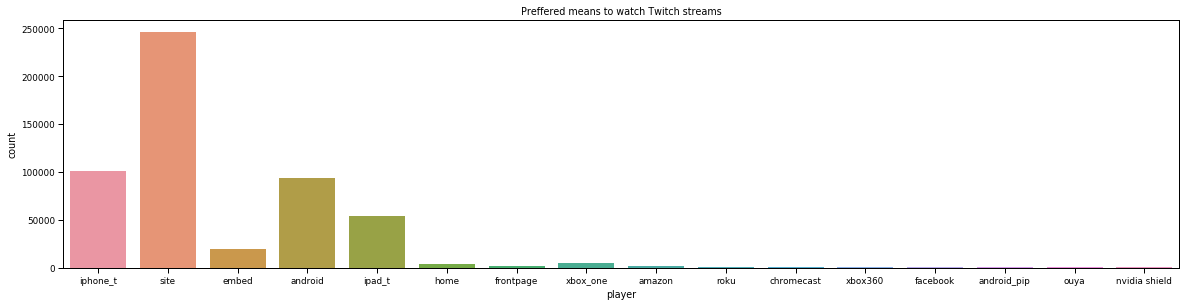

In [5]:
devices_split = plt.figure(figsize=[20,10])
sns.set_context("paper")
ax4 = plt.subplot(2,1,1)
sns.countplot(data=streams, x="player")
ax4.set_title("Preffered means to watch Twitch streams")



It is fairly evident from the graph that the most popular means of watching streams on Twitch is through the website/app followed by iphones, android phones and ipads.

The next step in this analysis would be to categorize and analyse the most popular genre of video games on Twitch.

Text(0.5, 1.0, 'Genres of games on Twitch')

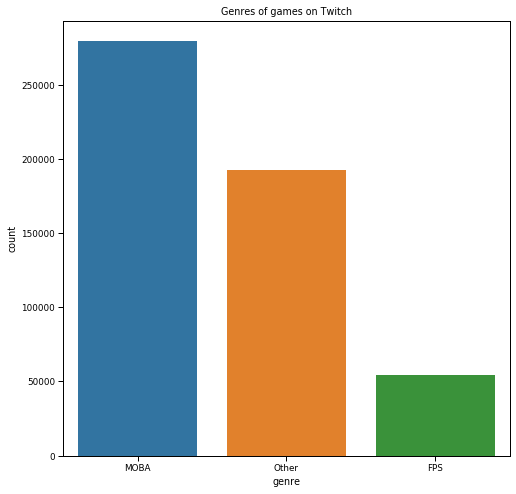

In [6]:
def genre(game):
    if game in ["League of Legends","Dota 2","Heroes of the Strom"]:
        return "MOBA"
    elif game == "Counter-Strike: Global Offensive":
        return "FPS"
    elif game == ["DayZ","Survival Evolved"]:
        return "Survival"
    else:
        return "Other"
    
streams["genre"] = streams.game.apply(genre)

genre_split = plt.figure(figsize=[8,8])
sns.set_context("paper")
ax5 = plt.subplot(1,1,1)
sns.countplot(data=streams, x="genre")
ax5.set_title("Genres of games on Twitch")



In [7]:
streams["hour"] = streams.time.apply(lambda x : float(dt.strftime(dt.strptime(x,"%Y-%m-%d %H:%M:%S"),"%H")))



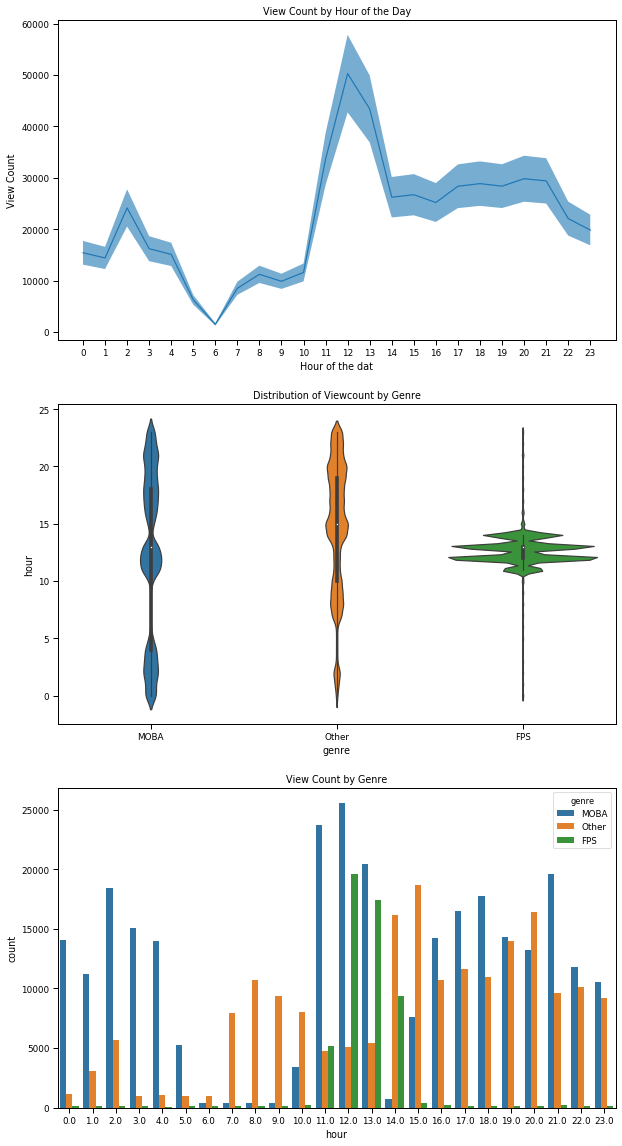

In [17]:
genre_split = plt.figure(figsize=[10,20])
sns.set_context("paper")
ax6 = plt.subplot(3,1,2)
ax6.set_title("Distribution of Viewcount by Genre")
ax6 = sns.violinplot(data=streams, x="genre", y="hour")


ax7 = plt.subplot(3,1,1)
ax7.set_title("View Count by Hour of the Day")
plt.fill_between(range(24),streams.groupby("hour").device_id.count()*1.15,streams.groupby("hour").device_id.count()*0.85,alpha=0.6)
plt.plot(range(24),streams.groupby("hour").device_id.count())
ax7.set_xticks(range(24))
ax7.set_xlabel("Hour of the dat")
ax7.set_ylabel("View Count")

ax8 = plt.subplot(3,1,3)
ax8.set_title("View Count by Genre")
sns.countplot(data=streams,x="hour",hue="genre")